In [ ]:
import requests
from bs4 import BeautifulSoup
import csv

def scrape_detik():
    url = 'https://www.detik.com/search/searchnews?query=pemilu+2024&sortby=time&page=1'
    req = requests.get(url)
    sop = BeautifulSoup(req.text, 'html.parser')
    li = sop.find('div', class_='list media_rows list-berita')
    lin = li.find_all('article')

    x = lin[0]  # Ambil hanya satu artikel, yaitu yang pertama
    link = x.find('a')['href']
    date = x.find('a').find('span', class_='date').text.replace('WIB','').replace('detikNews','').split(',')[1]
    headline = x.find('a').find('h2').text

    ge_ = requests.get(link).text
    sop_ = BeautifulSoup(ge_, 'html.parser')
    content = sop_.find('div', class_='detail__body-text itp_bodycontent')

    paragraphs = content.find_all('p')
    content_ = ''.join([p.get_text(strip=True) for p in paragraphs])

    return content_

# Panggil fungsi untuk scraping satu artikel
data = scrape_detik()
print(data)

Partai Garuda menyebut banyak fitnah yang ditujukan kepada Presiden Joko Widodo (Jokowi) saat ini. Partai Garuda prihatin karena Jokowi, meski menyatakan netral, tetap dicaci maki."Kasihan Pak Jokowi, beliau difitnah, dicaci maki oleh orang-orang yang besar karena menggunakan namanya, mereka ingin dan memaksa Jokowi untuk mengikuti keinginan mereka, mendukung pilihan mereka, jika tidak, maka nama Jokowi harus dirusak, agar 82% masyarakat yang puas akan kepemimpinan Jokowi, jadi membenci Jokowi," kata Juru Bicara Partai Garuda Teddy Gusnaidi dalam keterangannya, Kamis (2/11/2023)."Bahkan ketika beliau menyatakan netral dalam Pemilu, tetap saja beliau di fitnah, dicaci maki dan direndahkan hanya karena beliau tidak berpihak pada mereka," imbuh dia.ADVERTISEMENTSCROLL TO CONTINUE WITH CONTENTTeddy menyebut, Jokowi sebagai presiden tidak bisa diatur sesuai keinginan ,baik partai politik, relawan dan lainnya. Teddy menegaskan Jokowi bukanlah petugas partai."Beliau bukan petugas partai tapi 

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize

nltk.download('punkt')

# Fungsi untuk menghapus tanda baca, tokenisasi, dan stemming per kata dalam setiap kalimat
def tokenisasi_text(teks):
    # Tokenisasi kalimat
    kalimat = sent_tokenize(teks)
    return kalimat

sentence = tokenisasi_text(data)
print(sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Partai Garuda menyebut banyak fitnah yang ditujukan kepada Presiden Joko Widodo (Jokowi) saat ini.', 'Partai Garuda prihatin karena Jokowi, meski menyatakan netral, tetap dicaci maki.', '"Kasihan Pak Jokowi, beliau difitnah, dicaci maki oleh orang-orang yang besar karena menggunakan namanya, mereka ingin dan memaksa Jokowi untuk mengikuti keinginan mereka, mendukung pilihan mereka, jika tidak, maka nama Jokowi harus dirusak, agar 82% masyarakat yang puas akan kepemimpinan Jokowi, jadi membenci Jokowi," kata Juru Bicara Partai Garuda Teddy Gusnaidi dalam keterangannya, Kamis (2/11/2023).', '"Bahkan ketika beliau menyatakan netral dalam Pemilu, tetap saja beliau di fitnah, dicaci maki dan direndahkan hanya karena beliau tidak berpihak pada mereka," imbuh dia.ADVERTISEMENTSCROLL TO CONTINUE WITH CONTENTTeddy menyebut, Jokowi sebagai presiden tidak bisa diatur sesuai keinginan ,baik partai politik, relawan dan lainnya.', 'Teddy menegaskan Jokowi bukanlah petugas partai.', '"Beliau bukan 

In [ ]:
import math
from collections import Counter
import pandas as pd

# Menghitung jumlah kata dalam setiap kalimat
tf_kalimat = [Counter(words.split()) for words in sentence]

# Menghitung IDF (Inverse Document Frequency)
def calculate_tf_idf(tf_kalimat):
    num_documents = len(tf_kalimat)
    idf_values = {}

    # Mencari setiap kata dalam setiap kalimat untuk menghitung IDF
    for tf in tf_kalimat:
        for word, count in tf.items():
            if word in idf_values:
                idf_values[word] += 1
            else:
                idf_values[word] = 1

    tf_idf_kalimat = []

    for tf in tf_kalimat:
        tf_idf = {}
        for word, count in tf.items():
            tf_idf[word] = (count / len(tf)) * math.log(num_documents / idf_values[word])
        tf_idf_kalimat.append(tf_idf)

    return tf_idf_kalimat

# Hasil TF-IDF
hasil_tf_idf = calculate_tf_idf(tf_kalimat)

# Mengonversi list of dicts ke dalam DataFrame
df_tf_idf = pd.DataFrame(hasil_tf_idf)
df_tf_idf.fillna(0, inplace=True)  # Mengganti nilai NaN dengan 0

# Tampilkan hasil dalam DataFrame
df_tf_idf


,Partai,Garuda,menyebut,banyak,fitnah,yang,ditujukan,kepada,Presiden,Joko,...,lakukan,secara,masif.,Mereka,gunakan,jurus,mabok,mendegradasi,dipaksa,Teddy.
0,0.084190,0.068251,0.104738,0.183211,0.084190,0.104738,0.183211,0.183211,0.104738,0.183211,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.107150,0.086865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.023111,0.018736,0.000000,0.000000,0.000000,0.057503,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047301,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.266607,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.050290,0.077176,0.000000,0.062034,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.122195,0.000000,0.098221,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
import math
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Diasumsikan hasil_tf_idf adalah list yang berisi nilai TF-IDF

# Mengonversi list dari kamus ke DataFrame pandas
df_tf_idf = pd.DataFrame(hasil_tf_idf)
df_tf_idf = df_tf_idf.fillna(0)  # Mengganti nilai NaN dengan 0

# Mengonversi DataFrame ke array NumPy untuk perhitungan kesamaan kosinus
tfidf_matrix = df_tf_idf.to_numpy()

# Menghitung kesamaan kosinus
similarity_matrix = cosine_similarity(tfidf_matrix)
df_tf_idf = pd.DataFrame(similarity_matrix)

kalimat = ["Kalimat " + str(i) for i in range(1, len(similarity_matrix) + 1)]
df_tf_idf = df_tf_idf.set_axis(kalimat, axis=0)
df_tf_idf = df_tf_idf.set_axis(kalimat, axis=1)

df_tf_idf

,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10,Kalimat 11,Kalimat 12,Kalimat 13
Kalimat 1,1.000000,0.045616,0.049993,0.000000,0.000000,0.021198,0.000000,0.069192,0.067321,0.069631,0.136206,0.059010,0.000000
Kalimat 2,0.045616,1.000000,0.115078,0.107139,0.000000,0.000000,0.000000,0.000000,0.016329,0.000000,0.063886,0.000000,0.022817
Kalimat 3,0.049993,0.115078,1.000000,0.098234,0.042588,0.020888,0.001581,0.062553,0.019432,0.077074,0.061568,0.061997,0.061827
Kalimat 4,0.000000,0.107139,0.098234,1.000000,0.001731,0.045334,0.000897,0.000000,0.068770,0.001364,0.000000,0.035144,0.185816
Kalimat 5,0.000000,0.000000,0.042588,0.001731,1.000000,0.053465,0.002606,0.000000,0.006094,0.003965,0.000000,0.003360,0.005596
Kalimat 6,0.021198,0.000000,0.020888,0.045334,0.053465,1.000000,0.044067,0.073904,0.040676,0.001566,0.000000,0.086865,0.009672
Kalimat 7,0.000000,0.000000,0.001581,0.000897,0.002606,0.044067,1.000000,0.218076,0.003157,0.023156,0.025164,0.001741,0.002899
Kalimat 8,0.069192,0.000000,0.062553,0.000000,0.000000,0.073904,0.218076,1.000000,0.031228,0.026252,0.031305,0.000000,0.000000
Kalimat 9,0.067321,0.016329,0.019432,0.068770,0.006094,0.040676,0.003157,0.031228,1.000000,0.092326,0.019334,0.078243,0.131542
Kalimat 10,0.069631,0.000000,0.077074,0.001364,0.003965,0.001566,0.023156,0.026252,0.092326,1.000000,0.038277,0.125658,0.004410


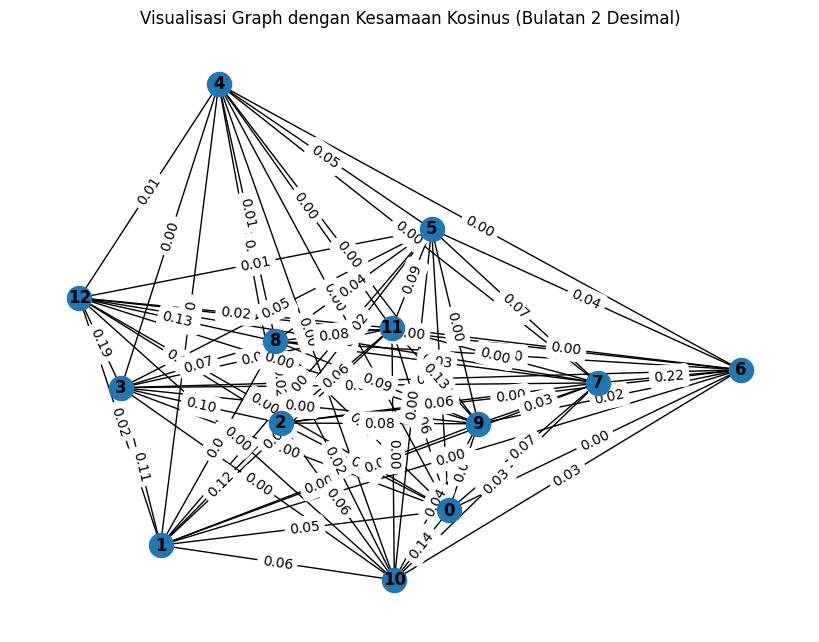

In [ ]:
import math
from collections import Counter
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt

# Diasumsikan similarity_matrix sudah didefinisikan sebelumnya
# Contoh similarity_matrix

G = nx.Graph()
for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix[0])):
        if i != j:
            similarity = round(similarity_matrix[i][j], 2)  # Bulatkan nilai ke 2 angka dibelakang koma
            G.add_edge(i, j, weight=similarity)

# Visualisasi grafik
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Menentukan layout grafik
nx.draw(G, pos, with_labels=True, font_weight='bold')  # Menggambar grafik dengan label node
edge_labels = nx.get_edge_attributes(G, 'weight')  # Mendapatkan atribut edge (bobot)
# Mengubah nilai bobot menjadi string dengan 2 angka di belakang koma
edge_labels = {(i, j): f"{weight:.2f}" for (i, j), weight in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # Menampilkan label bobot pada edge
plt.title("Visualisasi Graph dengan Kesamaan Kosinus (Bulatan 2 Desimal)")
plt.show()


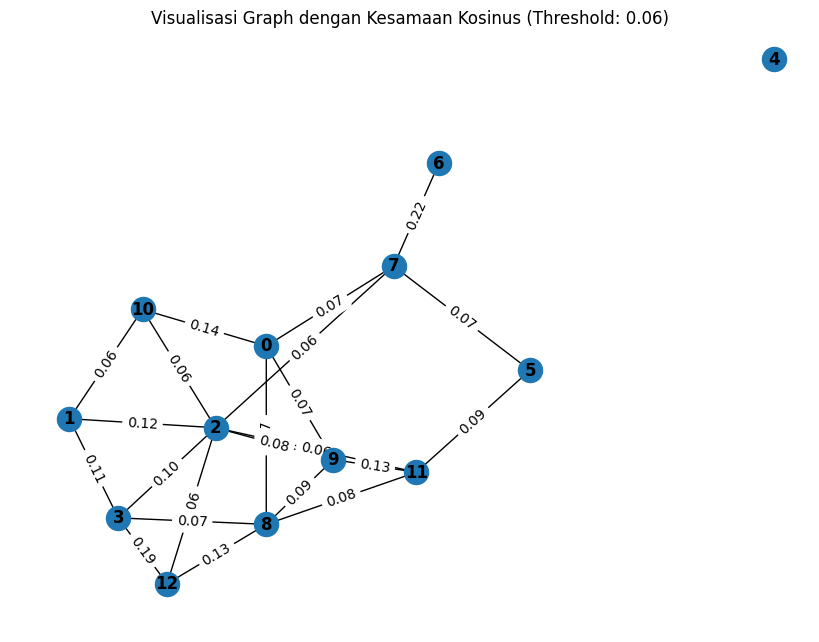

In [ ]:
import math
from collections import Counter
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt

# Diasumsikan similarity_matrix sudah didefinisikan sebelumnya
# Contoh similarity_matrix

G = nx.Graph()
threshold = 0.06  # Threshold untuk menyambungkan node

# Tambahkan semua node ke grafik
G.add_nodes_from(range(len(similarity_matrix)))

# Tambahkan edge antara node yang nilainya melebihi threshold
for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix[0])):
        if i != j and similarity_matrix[i][j] > threshold:
            similarity = round(similarity_matrix[i][j], 2)  # Bulatkan nilai ke 2 angka dibelakang koma
            G.add_edge(i, j, weight=similarity)

# Visualisasi grafik
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Menentukan layout grafik
nx.draw(G, pos, with_labels=True, font_weight='bold')  # Menggambar grafik dengan label node
edge_labels = nx.get_edge_attributes(G, 'weight')  # Mendapatkan atribut edge (bobot)
# Mengubah nilai bobot menjadi string dengan 2 angka di belakang koma
edge_labels = {(i, j): f"{weight:.2f}" for (i, j), weight in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # Menampilkan label bobot pada edge

# Tambahkan label pada node yang tidak terhubung
isolated_nodes = list(nx.isolates(G))
if isolated_nodes:
    # isolated_nodes_labels = {node: f'Node {node} (Not connected)' for node in isolated_nodes}
    pos_extra = {node: (pos[node][0], pos[node][1] + 0.1) for node in isolated_nodes}

plt.title(f"Visualisasi Graph dengan Kesamaan Kosinus (Threshold: {threshold})")
plt.show()


In [ ]:
# Menghitung closeness centrality dari graph
closeness = nx.closeness_centrality(G)

# Menampilkan closeness centrality
print("Closeness Centrality:")
for node, closeness_value in closeness.items():
    print(f"Node {node}: {closeness_value}")

# Menampilkan 3 kalimat dengan PageRank tertinggi
sorted_pagerank = sorted(closeness.items(), key=lambda x: x[1], reverse=True)

print("=============================")
print("Top 3 sentences based on closeness centrality:")
for node, rank in sorted_pagerank[:3]:
    print(sentence[node])

print("=============================")
print("Top 3 node based on closeness centrality:")
for node, rank in sorted_pagerank[:3]:
    print(f"Node {node} dengan PageRank {rank:.4f}")

Closeness Centrality:
Node 0: 0.5601851851851852
Node 1: 0.4801587301587302
Node 2: 0.6722222222222222
Node 3: 0.5041666666666667
Node 4: 0.0
Node 5: 0.42013888888888884
Node 6: 0.3601190476190476
Node 7: 0.5601851851851852
Node 8: 0.5601851851851852
Node 9: 0.5307017543859649
Node 10: 0.4801587301587302
Node 11: 0.5307017543859649
Node 12: 0.4801587301587302
Top 3 sentences based on PageRank:
"Kasihan Pak Jokowi, beliau difitnah, dicaci maki oleh orang-orang yang besar karena menggunakan namanya, mereka ingin dan memaksa Jokowi untuk mengikuti keinginan mereka, mendukung pilihan mereka, jika tidak, maka nama Jokowi harus dirusak, agar 82% masyarakat yang puas akan kepemimpinan Jokowi, jadi membenci Jokowi," kata Juru Bicara Partai Garuda Teddy Gusnaidi dalam keterangannya, Kamis (2/11/2023).
Partai Garuda menyebut banyak fitnah yang ditujukan kepada Presiden Joko Widodo (Jokowi) saat ini.
"Ini yang membuat negara-negara adikuasa murka, tapi ini yang membuat rakyat menyukai beliau.
Top

In [ ]:
# Hitung PageRank
pagerank = nx.pagerank(G)

# Menampilkan Closeness Centrality
print("PageRank:")
for node, rank in pagerank.items():
    print(f"Node {node}: {rank}")

# Menampilkan 3 kalimat dengan PageRank tertinggi
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

print("=============================")
print("Top 3 sentences based on PageRank:")
for node, rank in sorted_pagerank[:3]:
    print(sentence[node])

print("=============================")
print("Top 3 node based on PageRank:")
for node, rank in sorted_pagerank[:3]:
    print(f"Node {node} dengan PageRank {rank:.4f}")

#sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

PageRank:
Node 0: 0.0827114491904025
Node 1: 0.06700669391189373
Node 2: 0.11774454259892149
Node 3: 0.10048401760612956
Node 4: 0.012345679012345682
Node 5: 0.045213522615952295
Node 6: 0.05879005622644874
Node 7: 0.10430929258859716
Node 8: 0.09651726393678807
Node 9: 0.08414427967640428
Node 10: 0.06337122486159148
Node 11: 0.08512902276661938
Node 12: 0.08223295500790528
Top 3 sentences based on PageRank:
"Kasihan Pak Jokowi, beliau difitnah, dicaci maki oleh orang-orang yang besar karena menggunakan namanya, mereka ingin dan memaksa Jokowi untuk mengikuti keinginan mereka, mendukung pilihan mereka, jika tidak, maka nama Jokowi harus dirusak, agar 82% masyarakat yang puas akan kepemimpinan Jokowi, jadi membenci Jokowi," kata Juru Bicara Partai Garuda Teddy Gusnaidi dalam keterangannya, Kamis (2/11/2023).
"Ini yang membuat negara-negara adikuasa murka, tapi ini yang membuat rakyat menyukai beliau.
"Bahkan ketika beliau menyatakan netral dalam Pemilu, tetap saja beliau di fitnah, dic

In [ ]:
# Hitung Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(G)

# Hitung Eigenvalue Centrality
eigenvalue = nx.eigenvector_centrality_numpy(G)

# Menampilkan Eigenvector Centrality
print("Eigenvector Centrality:")
for node, eigenvector_value in eigenvector.items():
    print(f"Node {node}: {eigenvector_value:.4f}")

# Menampilkan 3 kalimat dengan PageRank tertinggi
sorted_pagerank = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)

print("=============================")
print("Top 3 sentences based on PageRank:")
for node, rank in sorted_pagerank[:3]:
    print(sentence[node])

print("=============================")
print("Top 3 node based on PageRank:")
for node, rank in sorted_pagerank[:3]:
    print(f"Node {node} dengan PageRank {rank:.4f}")


print("=============================")

# Menampilkan Eigenvalue Centrality
print("Eigenvalue Centrality:")
for node, eigenvalue_value in eigenvalue.items():
    print(f"Node {node}: {eigenvalue_value:.4f}")

# Menampilkan 3 kalimat dengan PageRank tertinggi
sorted_pagerank = sorted(eigenvalue.items(), key=lambda x: x[1], reverse=True)

print("=============================")
print("Top 3 sentences based on PageRank:")
for node, rank in sorted_pagerank[:3]:
    print(sentence[node])

print("=============================")
print("Top 3 node based on PageRank:")
for node, rank in sorted_pagerank[:3]:
    print(f"Node {node} dengan PageRank {rank:.4f}")



Eigenvector Centrality:
Node 0: 0.2771
Node 1: 0.2449
Node 2: 0.4656
Node 3: 0.3228
Node 4: 0.0000
Node 5: 0.1267
Node 6: 0.0527
Node 7: 0.2204
Node 8: 0.3642
Node 9: 0.3386
Node 10: 0.2361
Node 11: 0.3096
Node 12: 0.2755
Top 3 sentences based on PageRank:
"Kasihan Pak Jokowi, beliau difitnah, dicaci maki oleh orang-orang yang besar karena menggunakan namanya, mereka ingin dan memaksa Jokowi untuk mengikuti keinginan mereka, mendukung pilihan mereka, jika tidak, maka nama Jokowi harus dirusak, agar 82% masyarakat yang puas akan kepemimpinan Jokowi, jadi membenci Jokowi," kata Juru Bicara Partai Garuda Teddy Gusnaidi dalam keterangannya, Kamis (2/11/2023).
Jokowi tidak bisa diatur negara-negara adikuasa," ujar Teddy.Waketum Garuda itu menyebut fitnah terhadap Jokowi masih akan dilakukan para pembenci tersebut.
Dia menyebut fitnah ini akan terus dilancarkan demi memaksa Jokowi mengikuti kehendaknya.
Top 3 node based on PageRank:
Node 2 dengan PageRank 0.4656
Node 8 dengan PageRank 0.3642